<a href="https://colab.research.google.com/github/fahizakaruppanthodi/Paris-House-Price-Prediction-System/blob/main/Paris_House_Price_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import all necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [ ]:
df=pd.read_csv("/content/ParisHousingClassPrediction.csv")
df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313.0,9005,956.0,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653.0,2436,128.0,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937.0,8852,135.0,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659.0,7141,359.0,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435.0,2429,292.0,1,4,7055052.0,Luxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311.0,1698,218.0,0,4,176425.9,Basic
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061.0,1742,230.0,0,0,4448474.0,Basic
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304.0,7730,345.0,1,9,8390030.5,Basic
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590.0,6174,339.0,1,4,5905107.0,Basic


In [ ]:
df["category"].value_counts()


,count
category,
Basic,8735
Luxury,1265


In [ ]:
# show first 5 rows
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313.0,9005,956.0,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653.0,2436,128.0,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937.0,8852,135.0,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659.0,7141,359.0,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435.0,2429,292.0,1,4,7055052.0,Luxury


In [ ]:
# show last 5 rows
df.tail()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311.0,1698,218.0,0,4,176425.9,Basic
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061.0,1742,230.0,0,0,4448474.0,Basic
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304.0,7730,345.0,1,9,8390030.5,Basic
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590.0,6174,339.0,1,4,5905107.0,Basic
9999,1440,84,0,0,49,18412,6,10,1994,1,0,8485.0,2024,278.0,1,6,146708.4,Basic


In [ ]:
df.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,9991.000000,10000.00000,9953.000000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5032.806426,5028.01060,553.323119,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.482626,2894.33221,262.040646,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.000000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.500000,2512.00000,328.000000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5093.000000,5045.00000,555.000000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.000000,7540.50000,778.000000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.000000,1.000000,10.00000,1.000677e+07


In [ ]:
df.dtypes

,0
squareMeters,int64
numberOfRooms,int64
hasYard,int64
hasPool,int64
floors,int64
cityCode,int64
cityPartRange,int64
numPrevOwners,int64
made,int64
isNewBuilt,int64


In [ ]:
df.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price', 'category'],
      dtype='object')

In [ ]:
# check missing values
df.isna().sum()

,0
squareMeters,0
numberOfRooms,0
hasYard,0
hasPool,0
floors,0
cityCode,0
cityPartRange,0
numPrevOwners,0
made,0
isNewBuilt,0


In [ ]:
mode_value=df["garage"].mode()
mode_value

,garage
0,253.0


In [ ]:
df["garage"]=df["garage"].fillna(mode_value[0])
print(df)

      squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0            75523              3        0        1      63      9373   
1            80771             39        1        1      98     39381   
2            55712             58        0        1      19     34457   
3            32316             47        0        0       6     27939   
4            70429             19        1        1      90     38045   
...            ...            ...      ...      ...     ...       ...   
9995          1726             89        0        1       5     73133   
9996         44403             29        1        1      12     34606   
9997         83841              3        0        0      69     80933   
9998         59036             70        0        0      96     55856   
9999          1440             84        0        0      49     18412   

      cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0                 3              8  2005        

In [ ]:
# check missing values
df.isna().sum()

,0
squareMeters,0
numberOfRooms,0
hasYard,0
hasPool,0
floors,0
cityCode,0
cityPartRange,0
numPrevOwners,0
made,0
isNewBuilt,0


In [ ]:
# The code snippet provided is using LabelEncoder
# from scikit-learn to transform the "garage" column of the dataframe df1.
# it analyzes the values in the "garage" column
# and assigns a unique numerical label to each distinct value
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["garage"]=le.fit_transform(df["garage"])
df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313.0,9005,856,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653.0,2436,28,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937.0,8852,35,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659.0,7141,259,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435.0,2429,192,1,4,7055052.0,Luxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311.0,1698,118,0,4,176425.9,Basic
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061.0,1742,130,0,0,4448474.0,Basic
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304.0,7730,245,1,9,8390030.5,Basic
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590.0,6174,239,1,4,5905107.0,Basic


In [ ]:
df.drop(["cityCode","floors","cityPartRange"],axis=1,inplace=True)
df

,squareMeters,numberOfRooms,hasYard,hasPool,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,8,2005,0,1,4313.0,9005,856,0,7,7559081.5,Basic
1,80771,39,1,1,6,2015,1,0,3653.0,2436,28,1,2,8085989.5,Luxury
2,55712,58,0,1,8,2021,0,0,2937.0,8852,35,1,9,5574642.1,Basic
3,32316,47,0,0,4,2012,0,1,659.0,7141,259,0,3,3232561.2,Basic
4,70429,19,1,1,7,1990,1,0,8435.0,2429,192,1,4,7055052.0,Luxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,6,2009,0,1,9311.0,1698,118,0,4,176425.9,Basic
9996,44403,29,1,1,4,1990,0,1,9061.0,1742,130,0,0,4448474.0,Basic
9997,83841,3,0,0,10,2005,1,1,8304.0,7730,245,1,9,8390030.5,Basic
9998,59036,70,0,0,3,2010,0,1,2590.0,6174,239,1,4,5905107.0,Basic


In [ ]:
# features column separated
x=df.iloc[:,:-3].values
x

array([[7.5523e+04, 3.0000e+00, 0.0000e+00, ..., 9.0050e+03, 8.5600e+02,
        0.0000e+00],
       [8.0771e+04, 3.9000e+01, 1.0000e+00, ..., 2.4360e+03, 2.8000e+01,
        1.0000e+00],
       [5.5712e+04, 5.8000e+01, 0.0000e+00, ..., 8.8520e+03, 3.5000e+01,
        1.0000e+00],
       ...,
       [8.3841e+04, 3.0000e+00, 0.0000e+00, ..., 7.7300e+03, 2.4500e+02,
        1.0000e+00],
       [5.9036e+04, 7.0000e+01, 0.0000e+00, ..., 6.1740e+03, 2.3900e+02,
        1.0000e+00],
       [1.4400e+03, 8.4000e+01, 0.0000e+00, ..., 2.0240e+03, 1.7800e+02,
        1.0000e+00]])

In [ ]:
# target column separated
y=df.iloc[:,-3].values
y

array([7, 2, 9, ..., 9, 4, 6])

In [ ]:
# 70% train and 30% test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

array([[5.0580e+03, 6.4000e+01, 1.0000e+00, ..., 6.3560e+03, 8.8700e+02,
        0.0000e+00],
       [1.3688e+04, 9.0000e+00, 0.0000e+00, ..., 8.2770e+03, 1.7000e+01,
        0.0000e+00],
       [5.1100e+03, 3.0000e+00, 0.0000e+00, ..., 3.8410e+03, 1.2100e+02,
        0.0000e+00],
       ...,
       [9.8710e+04, 6.8000e+01, 1.0000e+00, ..., 7.3960e+03, 1.6000e+02,
        1.0000e+00],
       [1.7051e+04, 4.6000e+01, 1.0000e+00, ..., 7.0290e+03, 2.4600e+02,
        0.0000e+00],
       [3.6490e+03, 8.4000e+01, 1.0000e+00, ..., 7.1190e+03, 7.1400e+02,
        0.0000e+00]])

In [ ]:
x_test

array([[7.9553e+04, 7.0000e+00, 1.0000e+00, ..., 7.6030e+03, 7.9600e+02,
        1.0000e+00],
       [3.7047e+04, 7.9000e+01, 1.0000e+00, ..., 8.2160e+03, 6.0000e+01,
        0.0000e+00],
       [8.5476e+04, 3.6000e+01, 1.0000e+00, ..., 6.0430e+03, 5.9200e+02,
        1.0000e+00],
       ...,
       [5.2141e+04, 6.5000e+01, 0.0000e+00, ..., 8.8660e+03, 7.6600e+02,
        0.0000e+00],
       [5.8585e+04, 7.0000e+00, 0.0000e+00, ..., 6.4620e+03, 8.9200e+02,
        1.0000e+00],
       [4.8258e+04, 9.4000e+01, 0.0000e+00, ..., 5.0900e+02, 5.9300e+02,
        1.0000e+00]])

In [ ]:
y_train

array([10, 10,  4, ...,  4,  2, 10])

In [ ]:
y_test

array([1, 5, 7, ..., 5, 1, 7])

In [ ]:
# feature scaling using the standerdscaler from scikit-learn
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
x_train

array([[0.04976814, 0.63636364, 1.        , ..., 0.63556356, 0.98555556,
        0.        ],
       [0.13620384, 0.08080808, 0.        , ..., 0.82768277, 0.01888889,
        0.        ],
       [0.05028895, 0.02020202, 0.        , ..., 0.3840384 , 0.13444444,
        0.        ],
       ...,
       [0.98776078, 0.67676768, 1.        , ..., 0.73957396, 0.17777778,
        1.        ],
       [0.16988672, 0.45454545, 1.        , ..., 0.70287029, 0.27333333,
        0.        ],
       [0.03565598, 0.83838384, 1.        , ..., 0.71187119, 0.79333333,
        0.        ]])

*
model: RandomForestClassifier(random_state=42)
RandomForestClassifier(random_state=42) = 0.09166666666666666
[[36 36 32 26 25 12 24 20 15 21 29]
 [35 28 31 25 23 28 15 18 24 17 22]
 [33 32 36 17 29 21 18 16 19 19 32]
 [30 35 26 28 23 19 16 11 22 23 20]
 [34 26 30 36 23 25 21 24 14 16 17]
 [29 28 26 28 30 19 16 17 22 22 28]
 [29 25 30 32 25 30 23 20 28 18 25]
 [28 26 36 31 20 25 12 13 30 16 33]
 [30 34 23 40 19 30 15 18 22 27 19]
 [28 42 29 28 24 30 23 11 30 23 23]
 [27 31 25 29 28 26 25 22 23 19 24]]
              precision    recall  f1-score   support

           0       0.11      0.13      0.12       276
           1       0.08      0.11      0.09       266
           2       0.11      0.13      0.12       272
           3       0.09      0.11      0.10       253
           4       0.09      0.09      0.09       266
           5       0.07      0.07      0.07       265
           6       0.11      0.08      0.09       285
           7       0.07      0.05      0.06       270
     

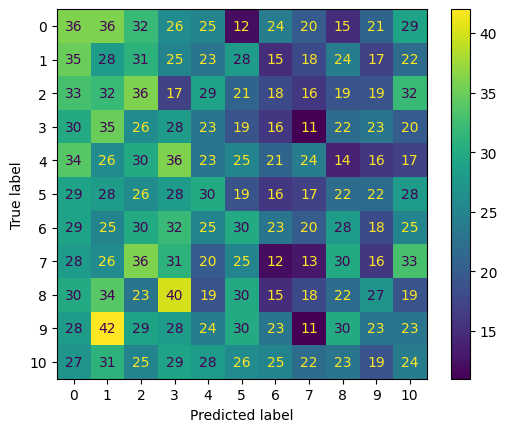

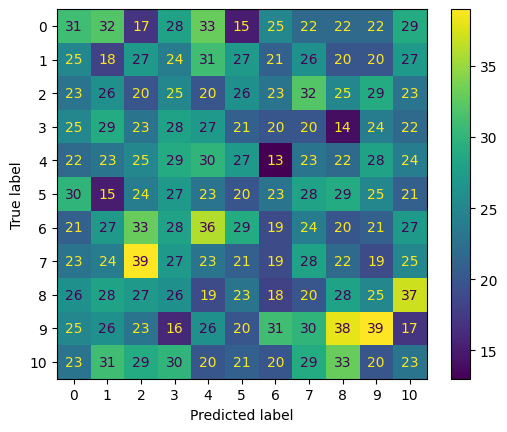

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm  import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
#  initializes the machine learning models with specific configurations:
rf=RandomForestClassifier(random_state=42)
dt=DecisionTreeClassifier(random_state=42)
sv=SVC(random_state=42)

# evaluate three different machine learning models:
a=[rf,dt]
for i in a:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  score=accuracy_score(y_test,y_pred) # Fixed accuracy_score
  matrix=confusion_matrix(y_test,y_pred)

  # update cm (if needed)
  unique_values = np.unique(np.concatenate((y_test, y_pred)))
  cm = unique_values.astype(str)
  cmd=ConfusionMatrixDisplay(matrix,display_labels=cm) #object to visualize the confusion matrix.

  print("*")
  print("model:",i )
  print(i,"=",score)
  print(matrix)

  print(cmd.plot()) #should work now
  print(classification_report(y_test,y_pred))